In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("laheebbayer/xray-data-sorted")

print("Path to dataset files:", path)

100%|██████████| 52.9G/52.9G [46:56<00:00, 20.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/laheebbayer/xray-data-sorted/versions/1


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image, ImageDraw, ImageFont
import numpy as np


In [6]:
# Define paths to folders
dataset_path = '/root/.cache/kagglehub/datasets/laheebbayer/xray-data-sorted/versions/1'
xray_data_folder = os.path.join(dataset_path, 'xray_data_sorted')
train_folder = os.path.join(xray_data_folder, 'train')

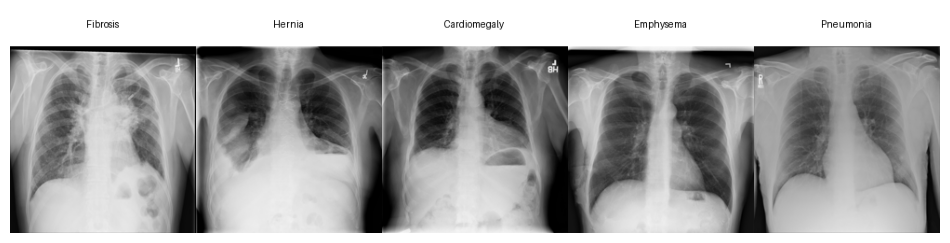

In [17]:
# Select 5 categories to display (you can modify this to choose different labels)
selected_labels = ['Fibrosis', 'Hernia', 'Cardiomegaly', 'Emphysema', 'Pneumonia']
images_with_labels = []

for label in selected_labels:
    label_folder = os.path.join(train_folder, label)
    # Get the path of the first image in the folder
    image_file = os.listdir(label_folder)[0]
    image_path = os.path.join(label_folder, image_file)
    # Open image and add it to the list with its label
    image = Image.open(image_path).convert("RGB")

    # Resize the image to have consistent dimensions (e.g., 200x200 pixels)
    image = image.resize((200, 200))

    # Add label on top of the image
    # Create an image with label text above the X-ray image
    label_image = Image.new('RGB', (200, 240), color=(255, 255, 255))  # extra space for label
    label_draw = ImageDraw.Draw(label_image)
    font = ImageFont.load_default()

    # Get the bounding box for the text to center it
    text_bbox = label_draw.textbbox((0, 0), label, font=font)
    text_width = text_bbox[2] - text_bbox[0]

    # Center the label text and draw it
    label_draw.text(((200 - text_width) // 2, 10), label, fill=(0, 0, 0), font=font)

    # Paste the resized image below the text label
    label_image.paste(image, (0, 40))

    # Append the image with label to the list
    images_with_labels.append(label_image)

# Concatenate the images horizontally
total_width = sum(img.width for img in images_with_labels)
max_height = max(img.height for img in images_with_labels)
combined_image = Image.new('RGB', (total_width, max_height))

# Paste images into the combined image
x_offset = 0
for img in images_with_labels:
    combined_image.paste(img, (x_offset, 0))
    x_offset += img.width

# Save the final image
combined_image.save("sample_disease_images.png")

# Display the final image within the notebook
plt.figure(figsize=(12, 6))
plt.imshow(combined_image)
plt.axis('off')  # Hide axes for cleaner visualization
plt.show()

In [7]:
# Count the number of images per disease category in the training folder
disease_counts = {}
for category in os.listdir(train_folder):
    category_path = os.path.join(train_folder, category)
    if os.path.isdir(category_path):
        disease_counts[category] = len(os.listdir(category_path))

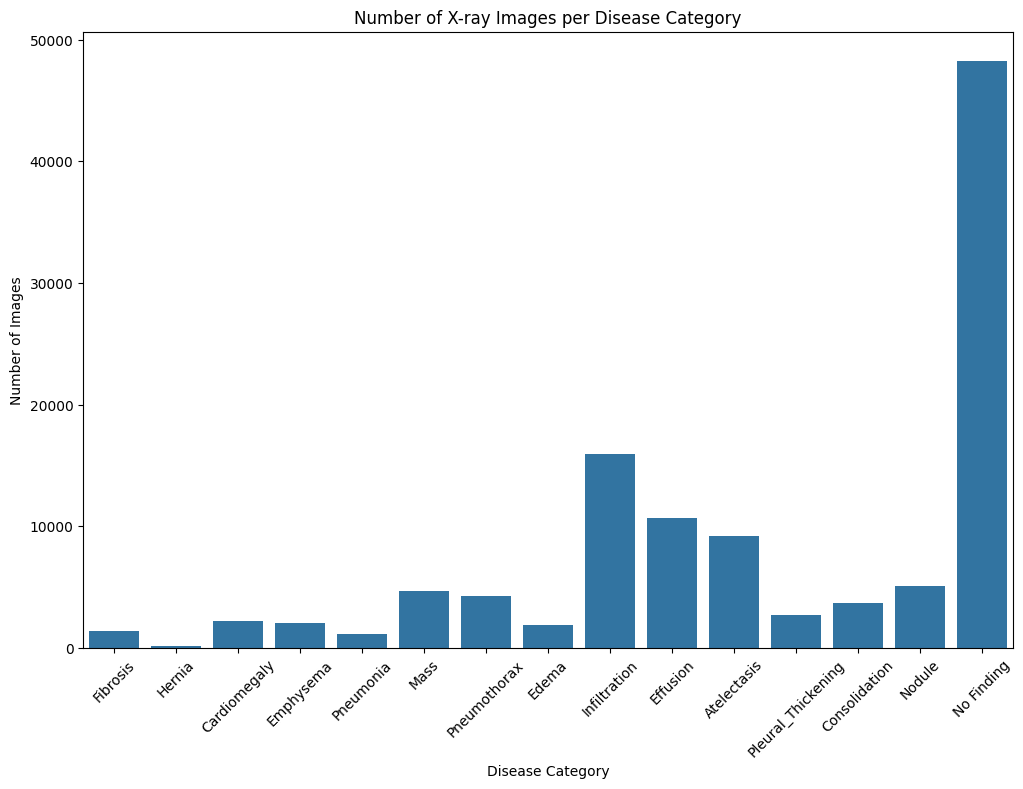

In [10]:
# Bar Plot: Number of Images per Disease Category
plt.figure(figsize=(12, 8))
sns.barplot(x=list(disease_counts.keys()), y=list(disease_counts.values()))
plt.xticks(rotation=45)
plt.title("Number of X-ray Images per Disease Category")
plt.xlabel("Disease Category")
plt.ylabel("Number of Images")
plt.savefig("disease_category_distribution.png")
plt.show()


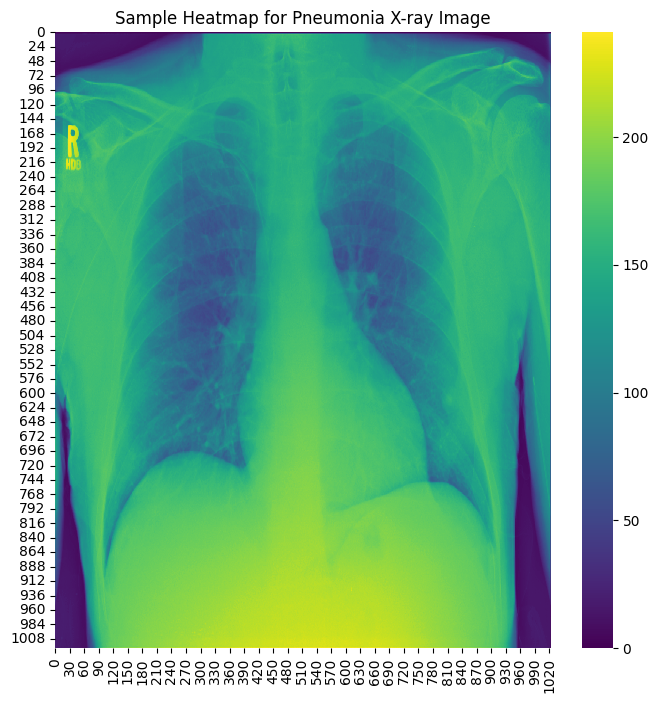

In [11]:
# Load a sample X-ray image for demonstration purposes
sample_category = 'Pneumonia'
sample_image_path = os.path.join(train_folder, sample_category, os.listdir(os.path.join(train_folder, sample_category))[0])
sample_image = Image.open(sample_image_path).convert("L")  # Convert to grayscale for analysis

# Display the image with heatmap overlay
image_array = np.array(sample_image)
plt.figure(figsize=(8, 8))
sns.heatmap(image_array, cmap="viridis")
plt.title(f"Sample Heatmap for {sample_category} X-ray Image")
plt.savefig("heatmap_example.png")
plt.show()